In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
# Load DataSet
df = pd.read_csv("./customer_segmentation.csv")
df.head()
df.info() # give info about dataset
# Know More About Varaibles
df["marital_status"].value_counts()
df.describe() # Get Max, Min, ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


/tmp/ipykernel_10194/3710514610.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.drop("customer_id", axis=1).hist(ax=ax)


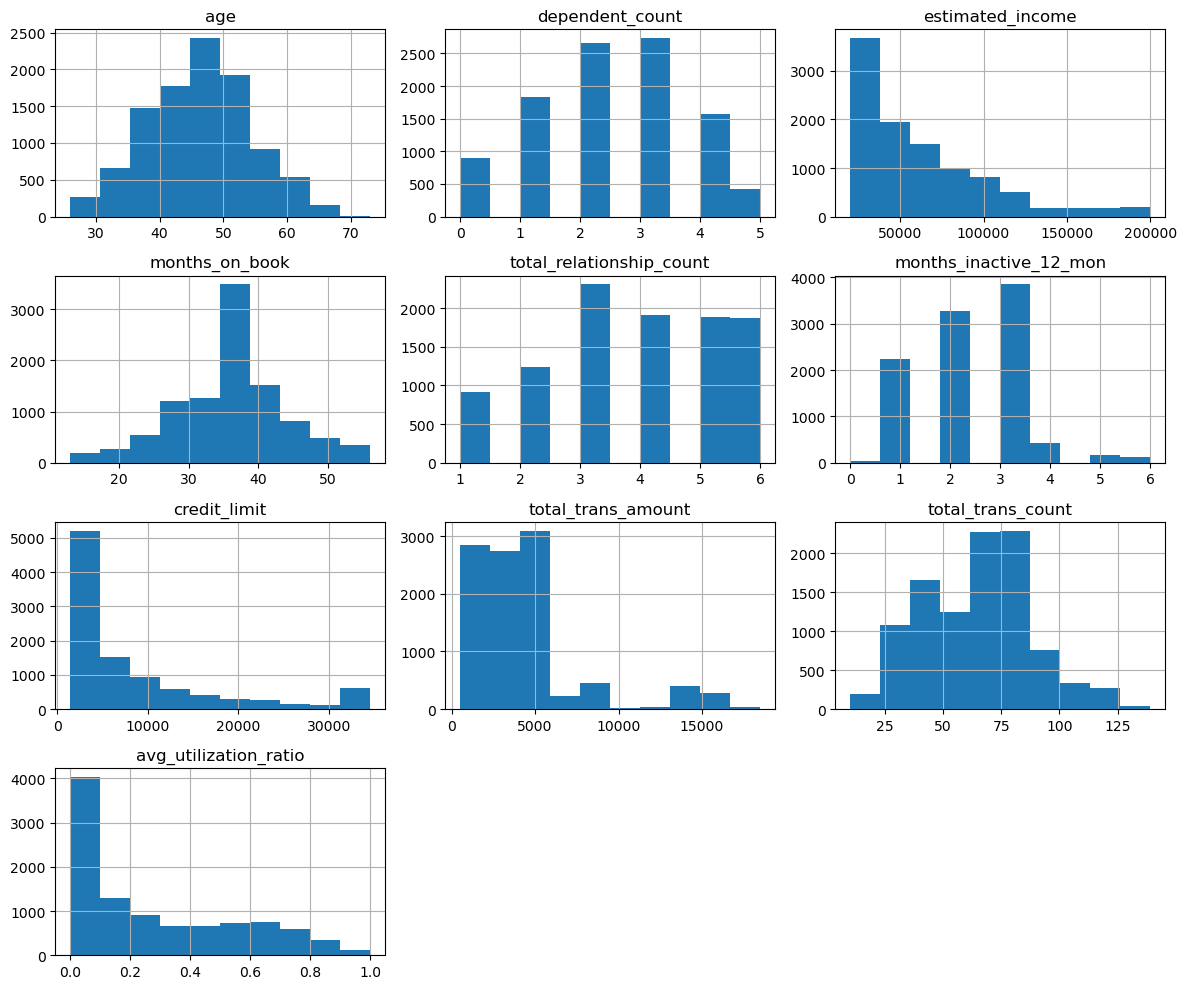

In [18]:
# Visual Each Varaible As Hostigram
fig, ax = plt.subplots(figsize=(12, 10))
df.drop("customer_id", axis=1).hist(ax=ax)

plt.tight_layout()
plt.show()

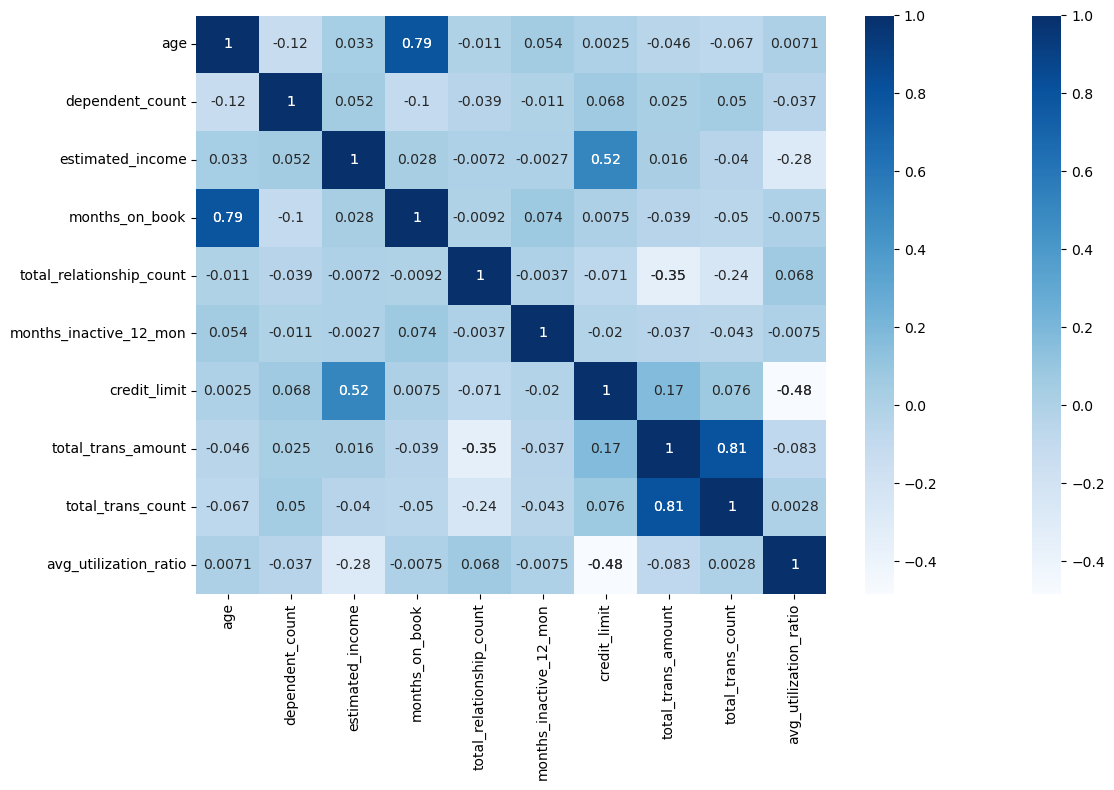

In [51]:
###### Exploratory Data Analysis (EDA):

# We need to know correlation between features [how the move] (we can remove some feature to make model more focused)
# Drop customer_id --> we don't need it
# And Calculate Features Between Just Numeric Feature
correlations = df.drop('customer_id', axis=1).corr(numeric_only=True)


fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(correlations, cmap='Blues', annot=True, ax=ax)
# Show Strong Correlation
sns.heatmap(correlations[(correlations > 0.30) | (correlations < -0.30)], cmap='Blues', annot=True, ax=ax)
plt.tight_layout()
plt.show()


In [59]:
# Good Paracte (Make Copy Of DataFrame)
customers_modif = df.copy()

# Transformer Gender Values (M --> 1, H --> 0)
customers_modif['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [60]:
# Update Education Level Also
df["education_level"].value_counts()
education_mapping = ({"Uneducated": 0, "High School": 1, "College": 2, "Graduate": 3, "Post-Graduate": 4, "Doctorate": 5})
customers_modif["education_level"] = customers_modif["education_level"].map(education_mapping)
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,65000,21,5,1,4716.0,816,28,0.000


In [61]:
# Update Education Level Also --> Using One Hot EnCoding
customers_modif["marital_status"].value_counts()
dummies = pd.get_dummies(customers_modif[["marital_status"]])

# Add dummies (new columns) to dataset
customers_modif = pd.concat([customers_modif, dummies], axis=1) # axis=1 is means add it as column
customers_modif.drop(['marital_status'], axis=1, inplace=True)

customers_modif.info()
customers_modif.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  int64  
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  int64  
 5   estimated_income          10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
 13  marital_status_Divorced   10127 non-null  bool   
 14  marita

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,False,True,False,False
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,False,True,False
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,False,True,False,False
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,False,True
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,False,True,False,False


### Scaling the Data

In [ ]:
# Know We Need to standardize Dataset (make values between 0 and 1) --> Scaling
X = customers_modif.drop('customer_id', axis=1) # drop customer_id --> this return dataSet without customer_id

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled # 2D table with values for each varaible

array([[-0.16540558,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -0.92821381,
         1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.41489356, -0.9434357 , -0.26654715, ...,  1.07733799,
        -0.79850685, -0.28260887]])

### Choose K (Number Of Clusters) --> The Elbow Method

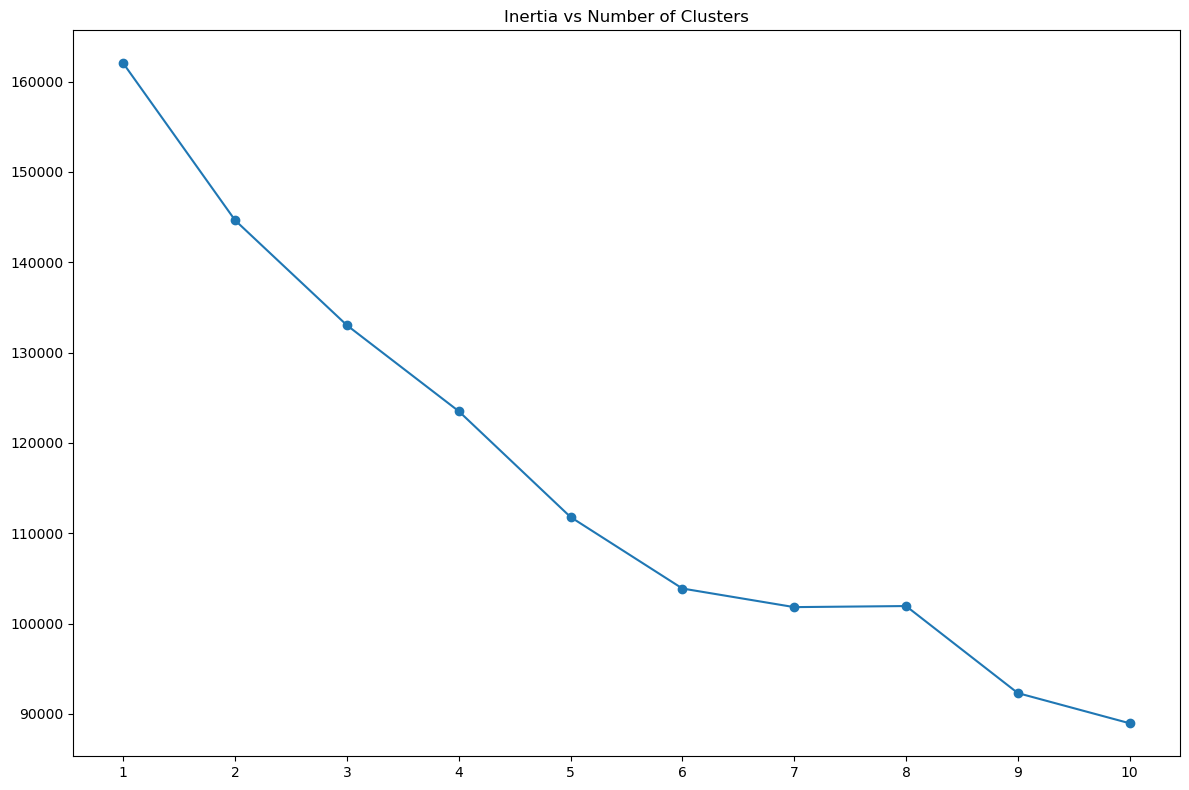

In [88]:
# A DataFrame is a two-dimensional table-like structure in Python
# Make DataFrame Based on Scaled
X = pd.DataFrame(X_scaled)
X

# Get Best K
inertias = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    y_predicated = model.fit_predict(X)
    # print(y_predicated) # get clusters for each row
    inertias.append(model.inertia_) # get WSCC total distance between points
    # print(inertias)

# Visualse Inertias vs Number Of Clusters
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()

# NOTE: If we run model again we can see a deffrent graph because centroid init with deffrent places

### Build The Mode

In [96]:
model = KMeans(n_clusters=6, max_iter=300)
y= model.fit_predict(X_scaled)

y

df["CLUSTER"] = y
df.head(10)

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,1
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,0
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,1
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,3
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,2
5,713061558,44,M,2,Graduate,Married,54000,36,3,1,4010.0,1088,24,0.311,2
6,810347208,51,M,4,High School,Married,166000,46,6,1,34516.0,1330,31,0.066,1
7,818906208,32,M,0,High School,Unknown,66000,27,2,2,29081.0,1538,36,0.048,3
8,710930508,37,M,3,Uneducated,Single,77000,36,5,2,22352.0,1350,24,0.113,1
9,719661558,48,M,2,Graduate,Single,87000,36,6,3,11656.0,1441,32,0.144,1


### Analyzing the Clusters

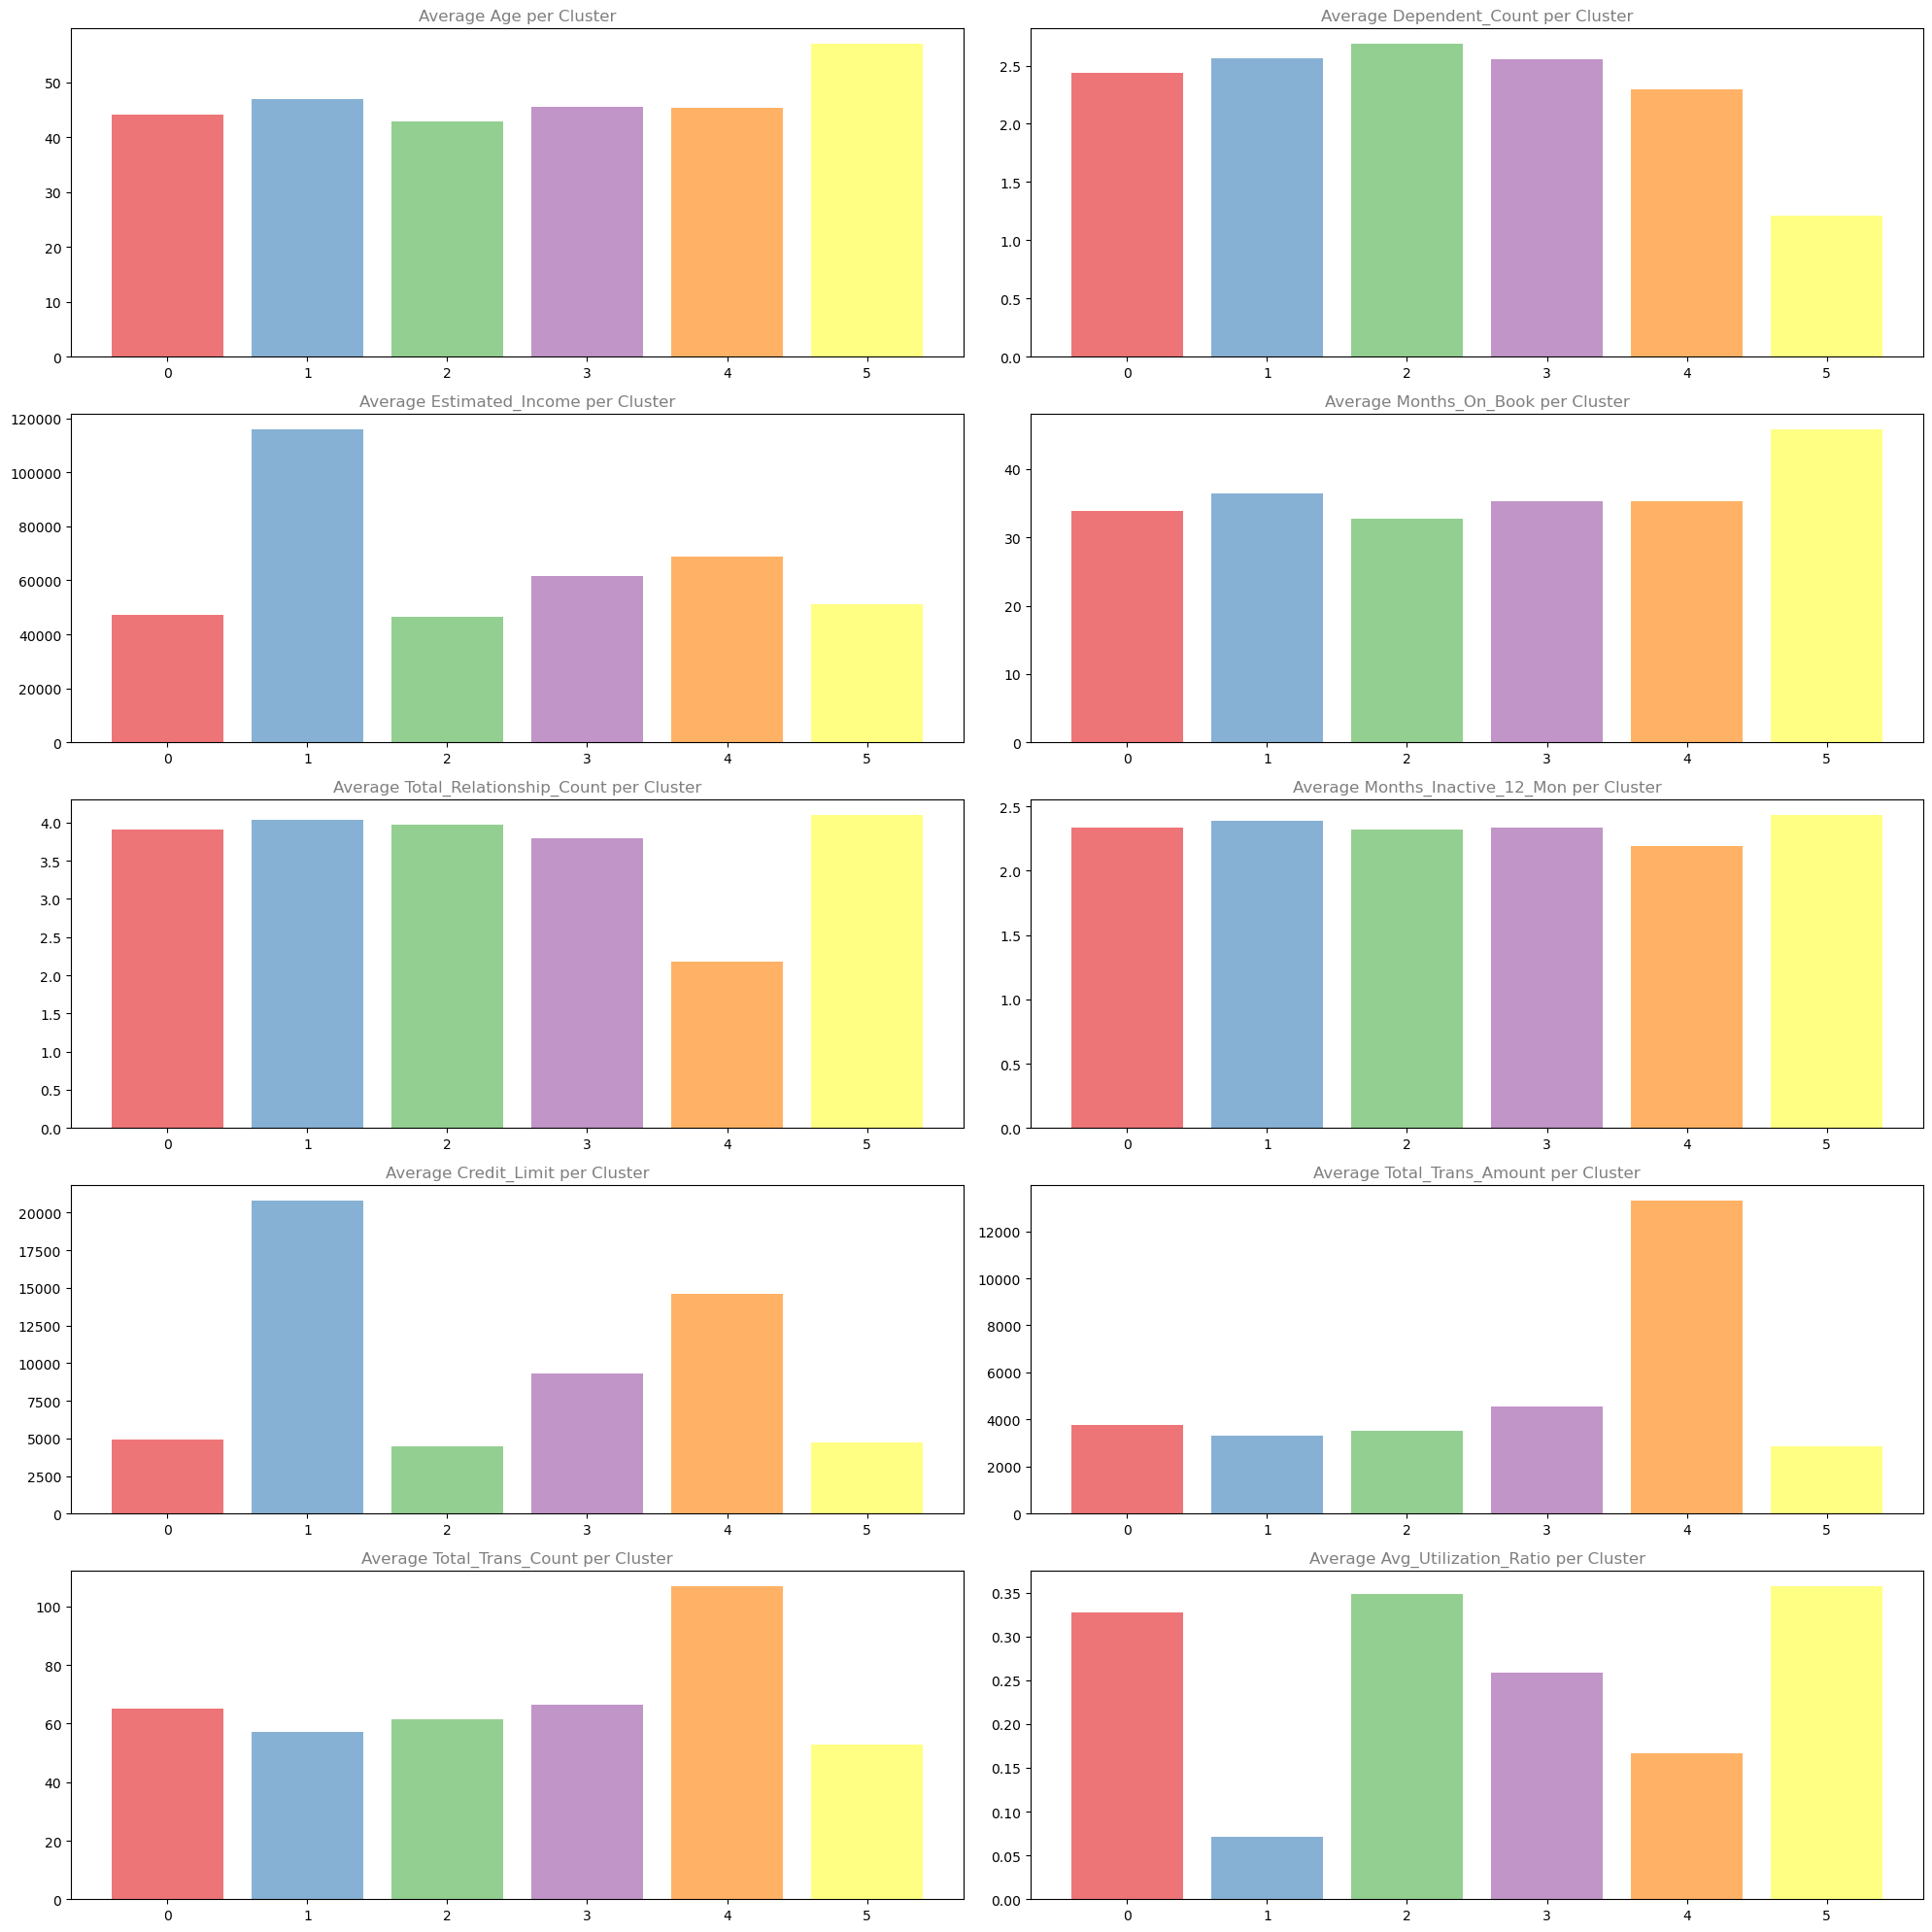

In [ ]:
df['CLUSTER'].value_counts()

# 
numeric_columns = df.select_dtypes(include=np.number).drop(['customer_id', 'CLUSTER'], axis=1).columns

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = df.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)

plt.tight_layout()
plt.show()
